# **Modelos predictivos de diabetes**

## **Valor normal de hemoglobina glicosilada y umbral de glucosa considerados**

In [ ]:
HbA1c_norm = 6
gluc_umbral = 126

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Diabetes en afroamericanos**

[Descripción del conjunto de datos](http://staff.pubhealth.ku.dk/~tag/Teaching/share/data/Diabetes.html)

#### *Variables*:
- id:	subject id
- chol:	Total Cholesterol
- stab.glu:	Stabilized Glucose
- hdl:	High Density Lipoprotein
- ratio:	Cholesterol/HDL Ratio
- glyhb:	Glycosolated Hemoglobin
- location:	a factor with levels (Buckingham,Louisa)
- age:	age (years)
- gender:	male or female
- height:	height (inches)
- weight:	weight (pounds)
- frame:	a factor with levels (small,medium,large)
- bp.1s:	First Systolic Blood Pressure
- bp.1d:	First Diastolic Blood Pressure
- bp.2s:	Second Systolic Blood Pressure
- bp.2d:	Second Diastolic Blood Pressure
- waist:	waist in inches
- hip:	hip in inches
- time.ppn:	Postprandial Time when Labs were Drawn in minutes



In [ ]:
df = pd.read_csv('diabetes.csv',)

In [ ]:
df.head()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0


In [ ]:
df.shape

(403, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        403 non-null    int64  
 1   chol      402 non-null    float64
 2   stab.glu  403 non-null    int64  
 3   hdl       402 non-null    float64
 4   ratio     402 non-null    float64
 5   glyhb     390 non-null    float64
 6   location  403 non-null    object 
 7   age       403 non-null    int64  
 8   gender    403 non-null    object 
 9   height    398 non-null    float64
 10  weight    402 non-null    float64
 11  frame     391 non-null    object 
 12  bp.1s     398 non-null    float64
 13  bp.1d     398 non-null    float64
 14  bp.2s     141 non-null    float64
 15  bp.2d     141 non-null    float64
 16  waist     401 non-null    float64
 17  hip       401 non-null    float64
 18  time.ppn  400 non-null    float64
dtypes: float64(13), int64(3), object(3)
memory usage: 59.9+ KB


In [ ]:
df['id'] = df['id'].astype(str)
#df.info()

In [ ]:
df.nunique()

id          403
chol        154
stab.glu    116
hdl          77
ratio        69
glyhb       239
location      2
age          68
gender        2
height       22
weight      140
frame         3
bp.1s        71
bp.1d        57
bp.2s        48
bp.2d        36
waist        30
hip          32
time.ppn     60
dtype: int64

In [ ]:
df.isnull().sum()/df.shape[0]*100

id           0.000000
chol         0.248139
stab.glu     0.000000
hdl          0.248139
ratio        0.248139
glyhb        3.225806
location     0.000000
age          0.000000
gender       0.000000
height       1.240695
weight       0.248139
frame        2.977667
bp.1s        1.240695
bp.1d        1.240695
bp.2s       65.012407
bp.2d       65.012407
waist        0.496278
hip          0.496278
time.ppn     0.744417
dtype: float64

#### Los campos correspondientes a la segunda medición de la presión sanguínea sistólica (**bp.2s**) y diastólica (**bp.2d**) presentan más del 65% de valores ausentes. Además, se cuenta con una primera medición de presión sanguínea sistólica y diastólica (**bp.1s** y **bp.1d**). Por estas razones fueron eliminadas del análisis y solo se consideró la primera medición de ambas variables.

#### Asimismo, la variable referente al tiempo postprandial (**time.ppn**), referida al tiempo transcurrido desde la ingestión de comida hasta la realización de los estudios de laboratorio fue excluida, dado que se consideró de baja relevancia para el presente estudio.

#### Finalmente, se prescinde también de la variable **frame**, dado que no se encontró una descripción precisa de la misma.

In [ ]:
cols = [col for col in df.columns if col not in ['bp.2s', 'bp.2d', 'time.ppn', 'frame']]
df = df[cols]
cols = ['id', 'Colesterol', 'Glucosa', 'HDL', 'Colesterol/HDL', 'HbA1c', 'Ubicación', 'Edad', 'Género', 'Estatura (in)', 'Peso (lb)', 'PS Sistólica', 'PS Diastólica', 'Cintura (in)', 'Cadera (in)']
df.columns = cols
df.head()

,id,Colesterol,Glucosa,HDL,Colesterol/HDL,HbA1c,Ubicación,Edad,Género,Estatura (in),Peso (lb),PS Sistólica,PS Diastólica,Cintura (in),Cadera (in)
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,118.0,59.0,29.0,38.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,112.0,68.0,46.0,48.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,190.0,92.0,49.0,57.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,110.0,50.0,33.0,38.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,138.0,80.0,44.0,41.0


In [ ]:
df.describe([quantile/100 for quantile in range(10,100,10)])

,Colesterol,Glucosa,HDL,Colesterol/HDL,HbA1c,Edad,Estatura (in),Peso (lb),PS Sistólica,PS Diastólica,Cintura (in),Cadera (in)
count,402.000000,403.000000,402.000000,402.000000,390.000000,403.000000,398.000000,402.000000,398.000000,398.000000,401.000000,401.000000
mean,207.845771,106.672457,50.445274,4.521642,5.589769,46.851117,66.020101,177.592040,136.904523,83.321608,37.900249,43.039900
std,44.445557,53.076655,17.262626,1.727886,2.242595,16.312333,3.918515,40.340666,22.741033,13.589227,5.729313,5.656713
min,78.000000,48.000000,12.000000,1.500000,2.680000,19.000000,52.000000,99.000000,90.000000,48.000000,26.000000,30.000000
10%,158.000000,74.000000,33.000000,2.710000,4.008000,26.200000,61.000000,126.100000,110.000000,66.000000,31.000000,37.000000
20%,173.000000,78.000000,36.000000,3.100000,4.280000,31.000000,63.000000,145.000000,120.000000,72.000000,33.000000,39.000000
30%,183.000000,82.000000,40.000000,3.400000,4.440000,37.000000,64.000000,156.300000,124.000000,76.000000,34.000000,40.000000
40%,194.000000,85.000000,44.000000,3.800000,4.660000,41.000000,65.000000,165.000000,130.000000,80.000000,36.000000,41.000000
50%,204.000000,89.000000,46.000000,4.200000,4.840000,45.000000,66.000000,172.500000,136.000000,82.000000,37.000000,42.000000
60%,214.600000,94.000000,51.000000,4.700000,5.064000,50.200000,67.000000,182.000000,140.000000,86.000000,39.000000,43.000000


### ***Tratamiento de valores atípicos***

In [ ]:
def hist_matrix(nrows, ncols, cols, dataframe, w=10, h=5, dpi=160):
  '''
  Función para generar una matriz de histogramas de las variables cuantitativas
  de un dataframe. Requiere la importación de matplotlib.pyplot como plt y de
  seaborn como sns.
  Parámetros:
  -nrows: int, Número de filas.
  -ncols: int, Número de columnas.
  -cols: list, Lista con los nombres de las columnas deseadas.
  -dataframe: pd.DataFrame, DataFrame deseado.
  -w: int, Ancho de cada figura.
  -h: int, Alto de cada figura.
  -dpi: int, Puntos por pulgada.
  '''
  i = 0
  f, axs = plt.subplots(nrows,ncols,figsize=(w,h), dpi=dpi, sharey=True)
  for r in range(nrows):
    for c in range(ncols):
      if nrows>1:
        sns.histplot(ax=axs[r][c], x=dataframe[cols[i]])
      else:
        sns.histplot(ax=axs[c], x=dataframe[cols[i]])
      i+=1
  plt.tight_layout()

In [ ]:
def drop_outliers_iqr(dataframe, series):
  '''
  Función para modificar un dataframe eliminando los valores atípicos con base
  en el criterio del rango intercuartílico.
  -dataframe: pd.DataFrame, DataFrame deseado.
  -series: str, Nombre de la columna deseada.
  '''
  print(f'Dimensiones del conjunto de datos: {dataframe.shape}\n')
  q1=dataframe[series].quantile(.25)
  q3=dataframe[series].quantile(.75)
  iqr=q3-q1
  print(f'q1: {q1}\nq3: {q3}\niqr: {iqr}\n')
  new_df = dataframe[~((dataframe[series]<q1-1.5*iqr)|(dataframe[series]>q3+1.5*iqr))]
  print(f'Nuevas dimensiones del conjunto de datos: {new_df.shape}\n')
  return new_df

In [ ]:
def download_fig(fig_name):
  '''
  Función que guarda la figura de la celda activa y la descarga al ordenador.
  Parámetros:
  -fig_name: str, Nombre de la figura. Debe especificarse la extensión del
  archivo de imagen.
  '''
  from google.colab import files
  plt.savefig(fig_name)
  files.download(fig_name)

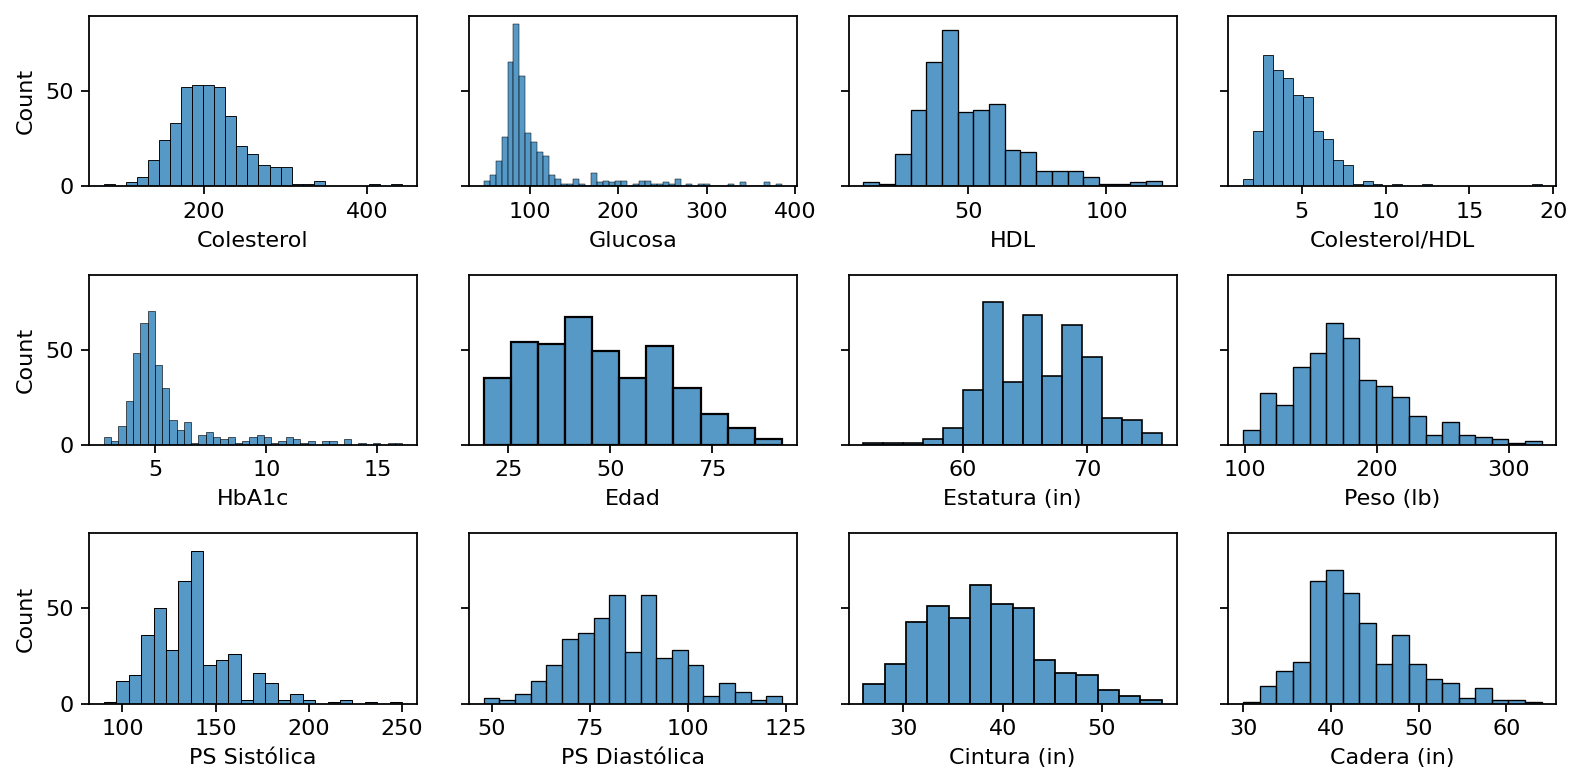

In [ ]:
hist_matrix(nrows=3, ncols=4, cols=df.describe().columns, dataframe=df)
#download_fig('diab1_hist_matrix_with_outliers.png')

##### Las variables **colesterol**, **estatura** y **presión sanguínea sistólica** muestran valores atípicos que se considera conveniente remover. Colesterol/HDL también, pero se verá afectada por la eliminación de los atípicos de colesterol. Las variables de glucosa y hemoglobina glicosilada (HbA1c) también muestran valores atípicos, pero se considera que pueden ser de utilidad para el análisis, dado que son las variables más relevantes para el diagnóstico de la diabetes.

##### **Tratamiento para Colesterol**

In [ ]:
df = drop_outliers_iqr(df, 'Colesterol')
#hist_matrix(nrows=3, ncols=4, cols=df.describe().columns, dataframe=df)

Dimensiones del conjunto de datos: (403, 15)

q1: 179.0
q3: 230.0
iqr: 51.0

Nuevas dimensiones del conjunto de datos: (394, 15)



##### **Tratamiento para Estatura**

In [ ]:
df = drop_outliers_iqr(df, 'Estatura (in)')
#hist_matrix(nrows=3, ncols=4, cols=df.describe().columns, dataframe=df)

Dimensiones del conjunto de datos: (394, 15)

q1: 63.0
q3: 69.0
iqr: 6.0

Nuevas dimensiones del conjunto de datos: (393, 15)



##### **Tratamiento para Presión Sanguínea Sistólica**

In [ ]:
df = drop_outliers_iqr(df, 'PS Sistólica')
#hist_matrix(nrows=3, ncols=4, cols=df.describe().columns, dataframe=df)

Dimensiones del conjunto de datos: (393, 15)

q1: 121.75
q3: 146.0
iqr: 24.25

Nuevas dimensiones del conjunto de datos: (379, 15)



##### **Tratamiento para HDL**

In [ ]:
df = drop_outliers_iqr(df, 'HDL')
#hist_matrix(nrows=3, ncols=4, cols=df.describe().columns, dataframe=df)

Dimensiones del conjunto de datos: (379, 15)

q1: 38.0
q3: 59.0
iqr: 21.0

Nuevas dimensiones del conjunto de datos: (369, 15)



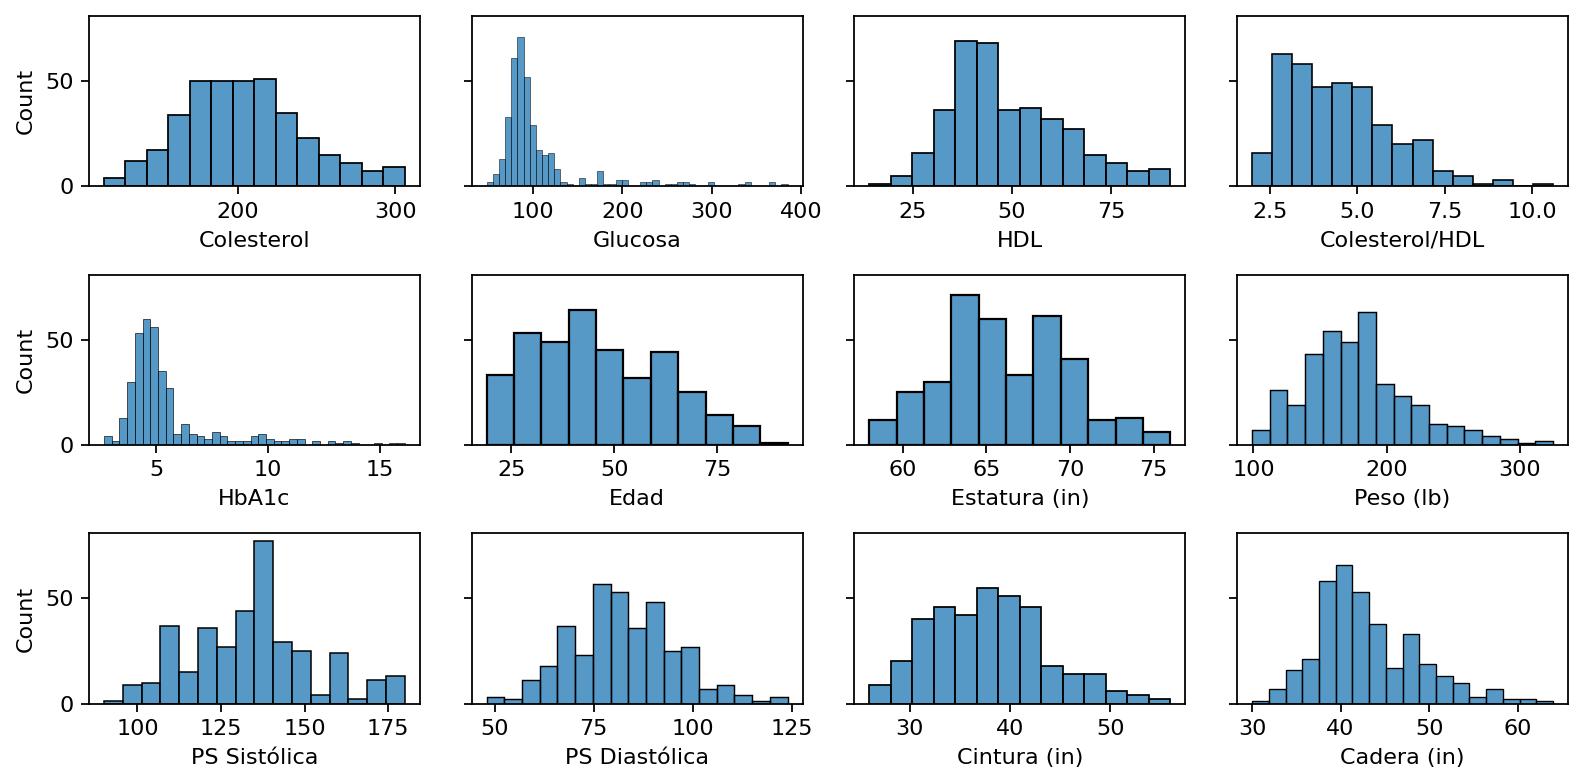

In [ ]:
hist_matrix(nrows=3, ncols=4, cols=df.describe().columns, dataframe=df)
#download_fig('diab1_hist_matrix_without_outliers.png')

### ***Tratamiento de valores ausentes***

In [ ]:
df.isnull().sum()

id                 0
Colesterol         1
Glucosa            0
HDL                1
Colesterol/HDL     1
HbA1c             13
Ubicación          0
Edad               0
Género             0
Estatura (in)      5
Peso (lb)          1
PS Sistólica       5
PS Diastólica      5
Cintura (in)       2
Cadera (in)        2
dtype: int64

In [ ]:
# Porcentaje de valores ausentes por campo:
df.isnull().sum()/df.shape[0]*100

id                0.000000
Colesterol        0.271003
Glucosa           0.000000
HDL               0.271003
Colesterol/HDL    0.271003
HbA1c             3.523035
Ubicación         0.000000
Edad              0.000000
Género            0.000000
Estatura (in)     1.355014
Peso (lb)         0.271003
PS Sistólica      1.355014
PS Diastólica     1.355014
Cintura (in)      0.542005
Cadera (in)       0.542005
dtype: float64

#### ***Tratamiento variables con menos del 1% de valores ausentes***
Las variables con menos del 1% de valores ausentes (todas cuantitativas) fueron rellenadas utilizando el valor de la mediana correspondiente.

In [ ]:
df_ajuste = df.copy()

In [ ]:
cols = ['Colesterol', 'HDL', 'Colesterol/HDL', 'Peso (lb)', 'Cintura (in)', 'Cadera (in)']
for col in cols:
  df_ajuste[col] = df_ajuste[col].fillna(df_ajuste[col].median())

In [ ]:
df_ajuste.isnull().sum()/df.shape[0]*100

id                0.000000
Colesterol        0.000000
Glucosa           0.000000
HDL               0.000000
Colesterol/HDL    0.000000
HbA1c             3.523035
Ubicación         0.000000
Edad              0.000000
Género            0.000000
Estatura (in)     1.355014
Peso (lb)         0.000000
PS Sistólica      1.355014
PS Diastólica     1.355014
Cintura (in)      0.000000
Cadera (in)       0.000000
dtype: float64

#### ***Tratamiento de variables con más del 1% de valores ausentes***
Las variables cuantitativas con más del 1% de valores ausentes fueron rellenadas con modelos probabilísticos.

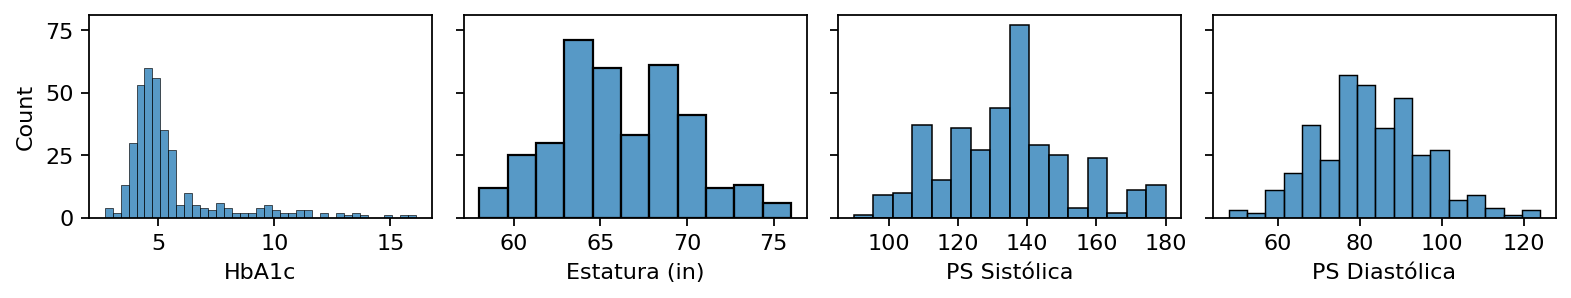

In [ ]:
hist_matrix(nrows=1, ncols=4, cols=['HbA1c', 'Estatura (in)', 'PS Sistólica', 'PS Diastólica'], dataframe=df_ajuste, h=2)

In [ ]:
!pip install fitter

In [ ]:
from fitter import Fitter, get_distributions
get_distributions()

['alpha',
 'anglit',
 'arcsine',
 'argus',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'crystalball',
 'dgamma',
 'dweibull',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'fatiguelife',
 'fisk',
 'foldcauchy',
 'foldnorm',
 'frechet_l',
 'frechet_r',
 'gamma',
 'gausshyper',
 'genexpon',
 'genextreme',
 'gengamma',
 'genhalflogistic',
 'geninvgauss',
 'genlogistic',
 'gennorm',
 'genpareto',
 'gilbrat',
 'gompertz',
 'gumbel_l',
 'gumbel_r',
 'halfcauchy',
 'halfgennorm',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'johnsonsb',
 'johnsonsu',
 'kappa3',
 'kappa4',
 'ksone',
 'kstwobign',
 'laplace',
 'levy',
 'levy_l',
 'levy_stable',
 'loggamma',
 'logistic',
 'loglaplace',
 'lognorm',
 'loguniform',
 'lomax',
 'maxwell',
 'mielke',
 'moyal',
 'nakagami',
 'ncf',
 'nct',
 'ncx2',
 'norm',
 'norminvgauss',
 'pareto',
 'pearson3',
 'powerlaw',
 'powerlognorm',
 'powernorm

##### ***Tratamiento para HbA1c***

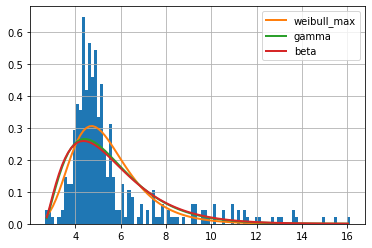

In [ ]:
# weibull_min no parece adecuada y mueve mucho el gráfico
#f1 = Fitter(df_ajuste['HbA1c'].dropna(), distributions=['gamma', 'beta', 'weibull_min', 'weibull_max'])
f = Fitter(df_ajuste['HbA1c'].dropna(), distributions=['gamma', 'beta', 'weibull_max'])
f.fit()
summary_ngtb = f.summary()

In [ ]:
best_params=f.get_best()
best_params

{'weibull_max': (216256669.47535568, 259898700.80648065, 259898696.08547497)}

In [ ]:
from scipy.stats import weibull_max
dist  = weibull_max(*best_params['weibull_max'])

In [ ]:
nulos = df_ajuste['HbA1c'].isnull().sum()
nulos

13

In [ ]:
# Imputación de valores utilizando la distribución weibull_max
df_ajuste.loc[df_ajuste['HbA1c'].isnull(),'HbA1c']=dist.rvs(size=nulos)

In [ ]:
# Corroboración de imputación
df_ajuste.isnull().sum()

id                0
Colesterol        0
Glucosa           0
HDL               0
Colesterol/HDL    0
HbA1c             0
Ubicación         0
Edad              0
Género            0
Estatura (in)     5
Peso (lb)         0
PS Sistólica      5
PS Diastólica     5
Cintura (in)      0
Cadera (in)       0
dtype: int64

##### ***Tratamiento para Estatura***

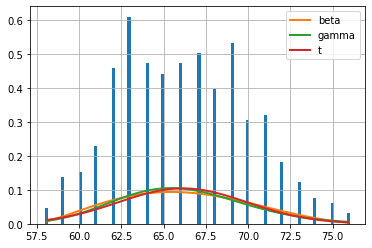

In [ ]:
#f = Fitter(df_ajuste['Estatura (in)'].dropna(), distributions=['gamma', 'beta', 'weibull_min', 'weibull_max'])
f = Fitter(df_ajuste['Estatura (in)'].dropna(), distributions=['gamma', 'beta', 't'])
f.fit()
summary_ngtb = f.summary()

In [ ]:
best_params=f.get_best()
best_params

{'beta': (2.73330538894339,
  3.611294779876075,
  57.09907904402057,
  20.957304964441448)}

In [ ]:
from scipy.stats import beta
dist  = beta(*best_params['beta'])

In [ ]:
nulos = df_ajuste['Estatura (in)'].isnull().sum()
nulos

5

In [ ]:
# Imputación de valores utilizando la distribución weibull_max
df_ajuste.loc[df_ajuste['Estatura (in)'].isnull(),'Estatura (in)']=dist.rvs(size=nulos)

In [ ]:
# Corroboración de imputación
df_ajuste.isnull().sum()

id                0
Colesterol        0
Glucosa           0
HDL               0
Colesterol/HDL    0
HbA1c             0
Ubicación         0
Edad              0
Género            0
Estatura (in)     0
Peso (lb)         0
PS Sistólica      5
PS Diastólica     5
Cintura (in)      0
Cadera (in)       0
dtype: int64

##### ***Tratamiento para Presión Sanguínea Sistólica***

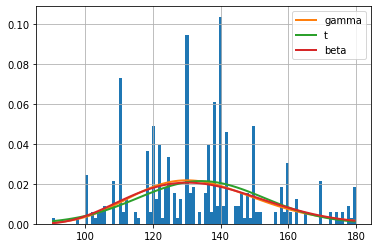

In [ ]:
#f = Fitter(df_ajuste['PS Sistólica'].dropna(), distributions=['gamma', 'beta', 'weibull_min', 'weibull_max'])
f = Fitter(df_ajuste['PS Sistólica'].dropna(), distributions=['gamma', 'beta', 't'])
f.fit()
summary_ngtb = f.summary()

In [ ]:
best_params=f.get_best()
best_params

{'gamma': (19.297004662173766, 52.06037376112947, 4.259475833973252)}

In [ ]:
from scipy.stats import gamma
dist  = gamma(*best_params['gamma'])

In [ ]:
nulos = df_ajuste['PS Sistólica'].isnull().sum()
nulos

5

In [ ]:
# Imputación de valores utilizando la distribución weibull_max
df_ajuste.loc[df_ajuste['PS Sistólica'].isnull(),'PS Sistólica']=dist.rvs(size=nulos)

In [ ]:
# Corroboración de imputación
df_ajuste.isnull().sum()

id                0
Colesterol        0
Glucosa           0
HDL               0
Colesterol/HDL    0
HbA1c             0
Ubicación         0
Edad              0
Género            0
Estatura (in)     0
Peso (lb)         0
PS Sistólica      0
PS Diastólica     5
Cintura (in)      0
Cadera (in)       0
dtype: int64

##### ***Tratamiento para Presión Sanguínea Diastólica***

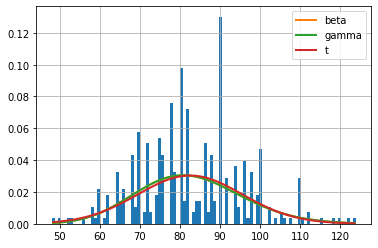

In [ ]:
#f = Fitter(df_ajuste['PS Diastólica'].dropna(), distributions=['gamma', 'beta', 'weibull_min', 'weibull_max'])
f = Fitter(df_ajuste['PS Diastólica'].dropna(), distributions=['gamma', 'beta', 't'])
f.fit()
summary_ngtb = f.summary()

In [ ]:
best_params=f.get_best()
best_params

{'beta': (31.458454122482525,
  172.32921289099568,
  2.1605069792955574,
  521.417586071291)}

In [ ]:
#from scipy.stats import beta
dist  = beta(*best_params['beta'])

In [ ]:
nulos = df_ajuste['PS Diastólica'].isnull().sum()
nulos

5

In [ ]:
# Imputación de valores utilizando la distribución weibull_max
df_ajuste.loc[df_ajuste['PS Diastólica'].isnull(),'PS Diastólica']=dist.rvs(size=nulos)

In [ ]:
# Corroboración de imputación
df_ajuste.isnull().sum()

id                0
Colesterol        0
Glucosa           0
HDL               0
Colesterol/HDL    0
HbA1c             0
Ubicación         0
Edad              0
Género            0
Estatura (in)     0
Peso (lb)         0
PS Sistólica      0
PS Diastólica     0
Cintura (in)      0
Cadera (in)       0
dtype: int64

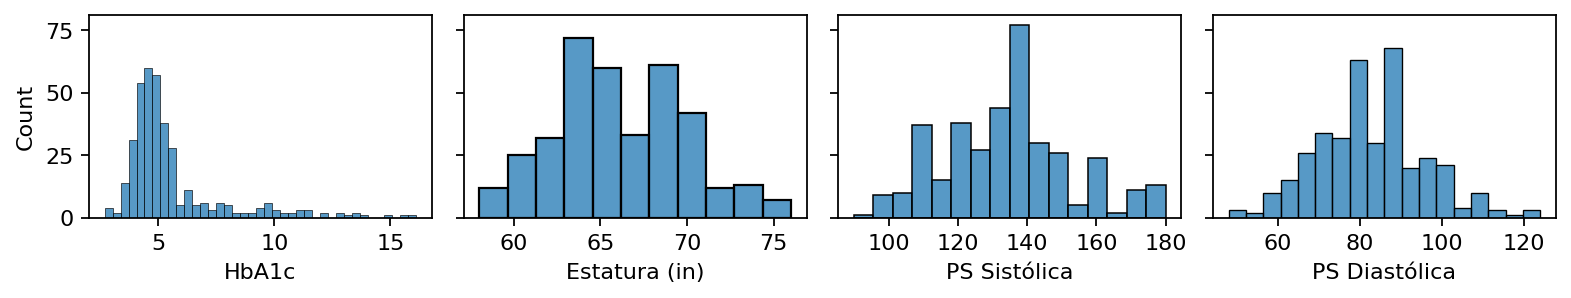

In [ ]:
hist_matrix(nrows=1, ncols=4, cols=['HbA1c', 'Estatura (in)', 'PS Sistólica', 'PS Diastólica'], dataframe=df_ajuste, h=2)

## **Análisis exploratorio de datos (EDA)**

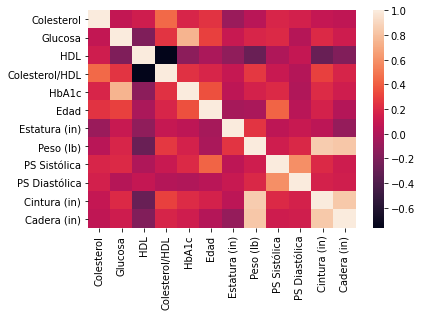

In [ ]:
sns.heatmap(df.corr())

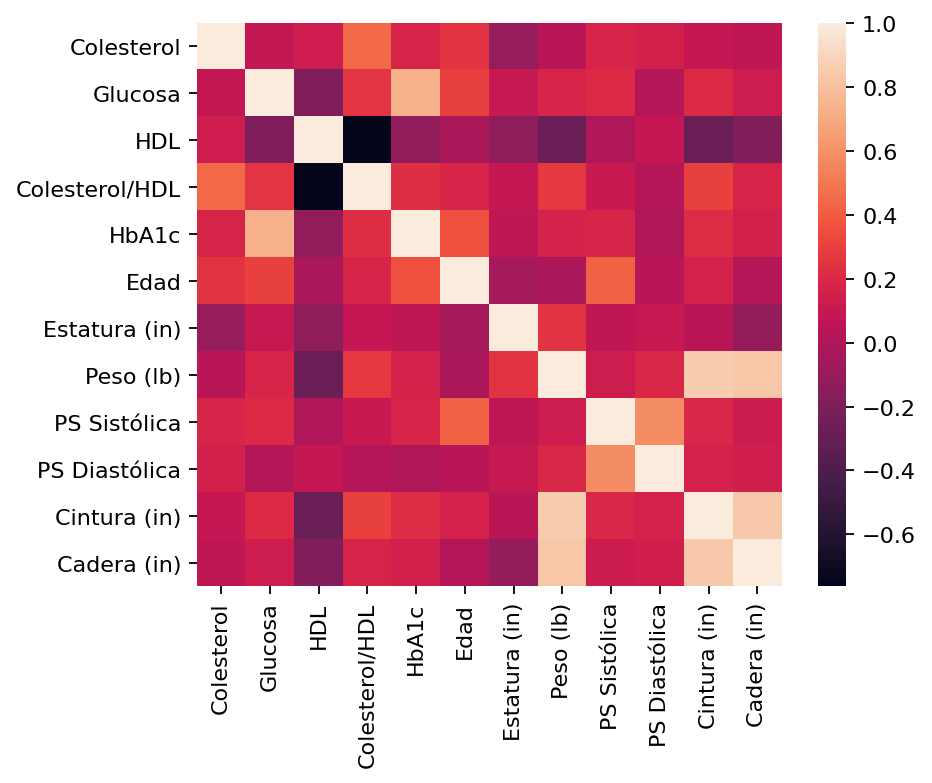

In [ ]:
f, axs = plt.subplots(1,1,figsize=(6,5), dpi=160)
sns.heatmap(df_ajuste.corr())
plt.tight_layout()
#download_fig('diab1_heat_map.png')

La correlación entre glucosa y hemoglobina glicosilada (HbA1c) afianza la hipótesis de que la medida de glucosa tomada es la correspondiente a la primera del día en ayuno.

Hay tres registros que resultan extraños, a saber, dos en los que el nivel de glucosa es menor a 100 y la HbA1c es mayor a 10 y uno en el que el nivel de glucosa es mayor a 350 y la HbA1c es menor a 6. Estos prevalecieron después de las transformaciones en el conjunto de datos y por ello fueron eliminados del conjunto de ajuste.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


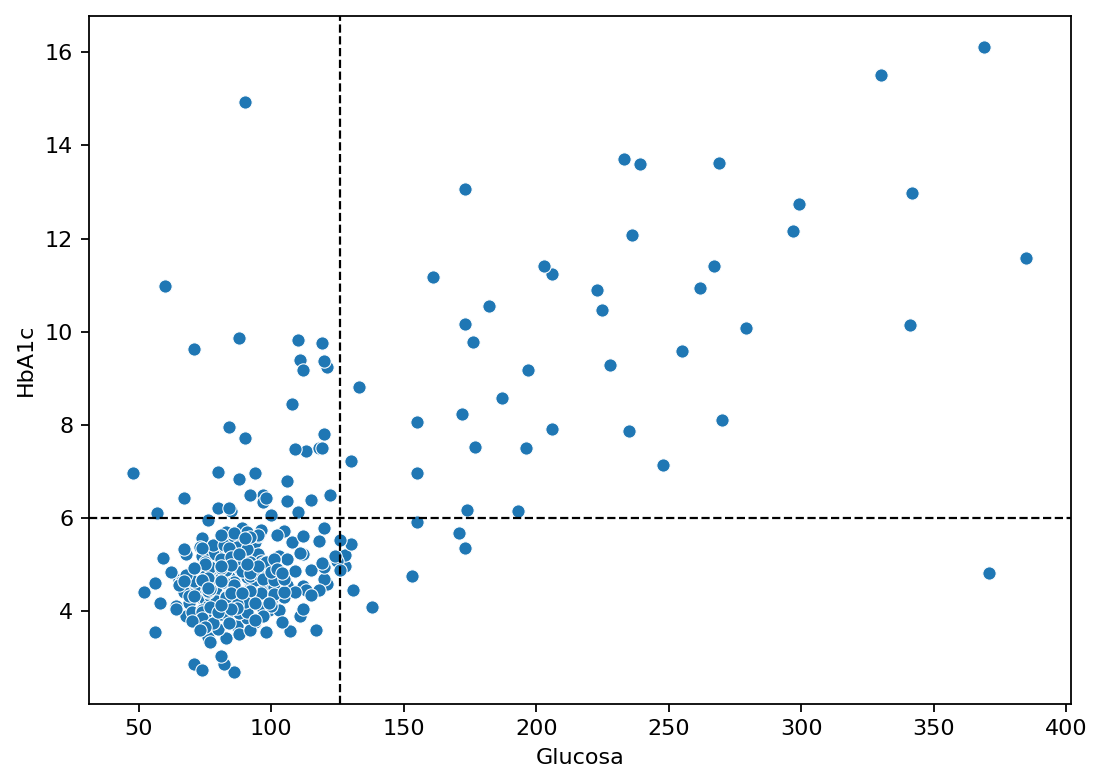

In [ ]:
f, axs = plt.subplots(1,1,figsize=(7,5), dpi=160)

sns.scatterplot(df_ajuste['Glucosa'], df_ajuste['HbA1c'])
plt.axhline(y=HbA1c_norm, color='k', linewidth=1, linestyle='--')
plt.axvline(x=gluc_umbral, color='k', linewidth=1, linestyle='--')

plt.tight_layout()
#download_fig('diab1_gluc_hba1c.png')

***Identificación y eliminación de los 3 registros atípicos del conjunto de ajuste:***

In [ ]:
df_ajuste[(df_ajuste['Glucosa']>350) & (df_ajuste['HbA1c']<6)]

,id,Colesterol,Glucosa,HDL,Colesterol/HDL,HbA1c,Ubicación,Edad,Género,Estatura (in),Peso (lb),PS Sistólica,PS Diastólica,Cintura (in),Cadera (in)
194,15546,143.0,371,46.0,3.1,4.81,Louisa,68,male,67.0,158.0,138.0,82.0,37.0,43.0


In [ ]:
df_ajuste.drop(df_ajuste[(df_ajuste['Glucosa']>350) & (df_ajuste['HbA1c']<6)].index, inplace=True)

In [ ]:
df_ajuste[(df_ajuste['Glucosa']>350) & (df_ajuste['HbA1c']<6)]

,id,Colesterol,Glucosa,HDL,Colesterol/HDL,HbA1c,Ubicación,Edad,Género,Estatura (in),Peso (lb),PS Sistólica,PS Diastólica,Cintura (in),Cadera (in)


In [ ]:
df_ajuste[(df_ajuste['Glucosa']<100) & (df_ajuste['HbA1c']>10)]

,id,Colesterol,Glucosa,HDL,Colesterol/HDL,HbA1c,Ubicación,Edad,Género,Estatura (in),Peso (lb),PS Sistólica,PS Diastólica,Cintura (in),Cadera (in)
333,21298,220.0,60,66.0,3.3,10.97,Buckingham,26,male,70.0,150.0,136.0,88.0,33.0,39.0
362,40774,203.0,90,51.0,4.0,14.94,Louisa,60,female,59.0,123.0,130.0,72.0,36.0,41.0


In [ ]:
df_ajuste.drop(df_ajuste[(df_ajuste['Glucosa']<100) & (df_ajuste['HbA1c']>10)].index, inplace=True)

In [ ]:
df_ajuste[(df_ajuste['Glucosa']<100) & (df_ajuste['HbA1c']>10)]

,id,Colesterol,Glucosa,HDL,Colesterol/HDL,HbA1c,Ubicación,Edad,Género,Estatura (in),Peso (lb),PS Sistólica,PS Diastólica,Cintura (in),Cadera (in)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


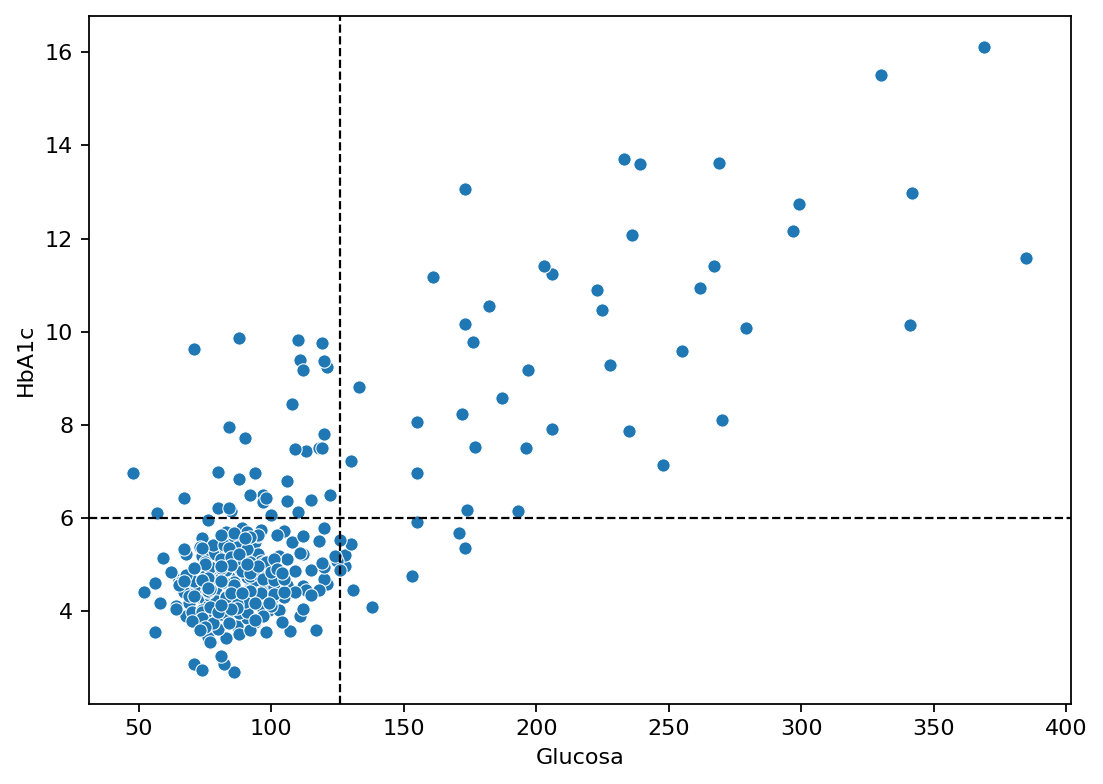

In [ ]:
f, axs = plt.subplots(1,1,figsize=(7,5), dpi=160)

sns.scatterplot(df_ajuste['Glucosa'], df_ajuste['HbA1c'])
plt.axhline(y=HbA1c_norm, color='k', linewidth=1, linestyle='--')
plt.axvline(x=gluc_umbral, color='k', linewidth=1, linestyle='--')

plt.tight_layout()
#download_fig('diab1_gluc_hba1c_no_outliers.png')

No parecen existir diferencias importantes con base en las variables de Ubicación y Género.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


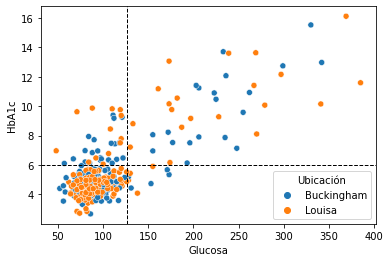

In [ ]:
sns.scatterplot(df_ajuste['Glucosa'], df_ajuste['HbA1c'], hue=df_ajuste['Ubicación'])
plt.axhline(y=HbA1c_norm, color='k', linewidth=1, linestyle='--')
plt.axvline(x=gluc_umbral, color='k', linewidth=1, linestyle='--')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


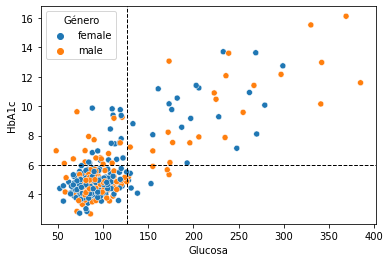

In [ ]:
sns.scatterplot(df_ajuste['Glucosa'], df_ajuste['HbA1c'], hue=df_ajuste['Género'])
plt.axhline(y=HbA1c_norm, color='k', linewidth=1, linestyle='--')
plt.axvline(x=gluc_umbral, color='k', linewidth=1, linestyle='--')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


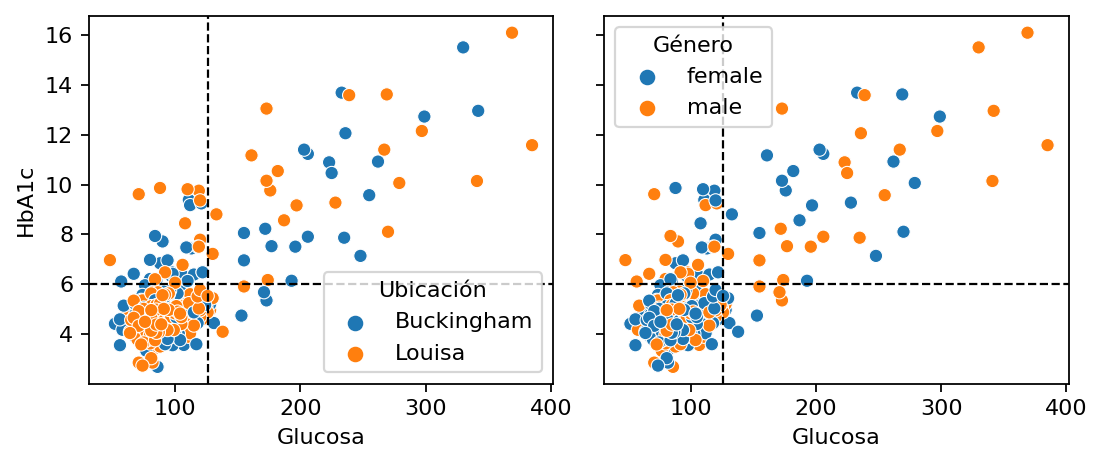

In [ ]:
f, axs = plt.subplots(1,2,figsize=(7,3), dpi=160, sharey=True)

#sns.histplot(ax=axs[r][c], x=dataframe[cols[i]])
sns.scatterplot(df_ajuste['Glucosa'], df_ajuste['HbA1c'], ax=axs[0], hue=df_ajuste['Ubicación'])
axs[0].axhline(y=HbA1c_norm, color='k', linewidth=1, linestyle='--', )
axs[0].axvline(x=gluc_umbral, color='k', linewidth=1, linestyle='--')

sns.scatterplot(df_ajuste['Glucosa'], df_ajuste['HbA1c'], ax=axs[1], hue=df_ajuste['Género'])
axs[1].axhline(y=HbA1c_norm, color='k', linewidth=1, linestyle='--')
axs[1].axvline(x=gluc_umbral, color='k', linewidth=1, linestyle='--')

plt.tight_layout()
#download_fig('diab1_gluc_hba1c_loc_gender.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


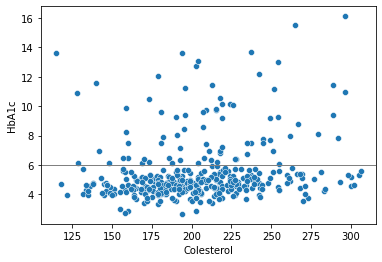

In [ ]:
sns.scatterplot(df_ajuste['Colesterol'], df_ajuste['HbA1c'])
plt.axhline(y=HbA1c_norm, color='gray', linewidth=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


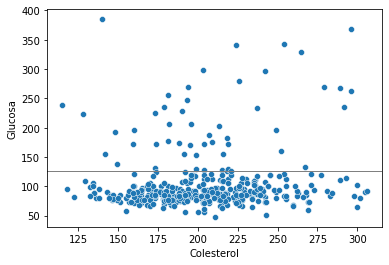

In [ ]:
sns.scatterplot(df_ajuste['Colesterol'], df_ajuste['Glucosa'])
plt.axhline(y=gluc_umbral, color='gray', linewidth=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


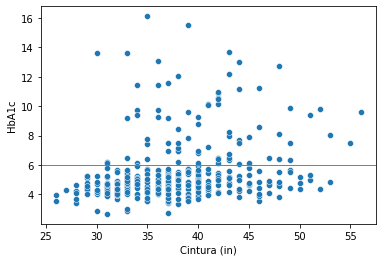

In [ ]:
sns.scatterplot(df_ajuste['Cintura (in)'], df_ajuste['HbA1c'])
plt.axhline(y=HbA1c_norm, color='gray', linewidth=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


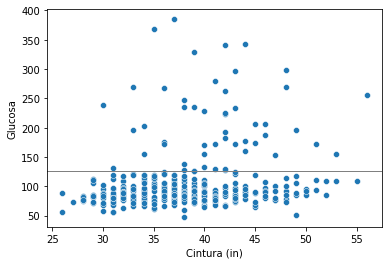

In [ ]:
sns.scatterplot(df_ajuste['Cintura (in)'], df_ajuste['Glucosa'])
plt.axhline(y=gluc_umbral, color='gray', linewidth=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


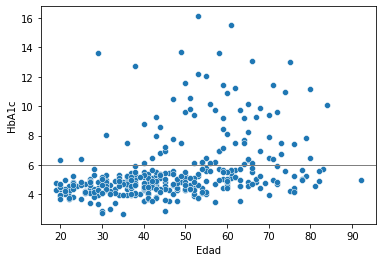

In [ ]:
sns.scatterplot(df_ajuste['Edad'], df_ajuste['HbA1c'])
plt.axhline(y=HbA1c_norm, color='gray', linewidth=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


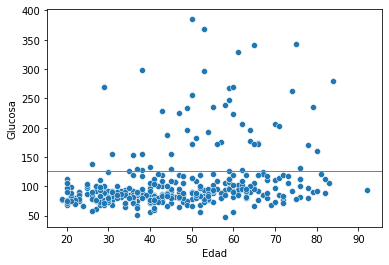

In [ ]:
sns.scatterplot(df_ajuste['Edad'], df_ajuste['Glucosa'])
plt.axhline(y=gluc_umbral, color='gray', linewidth=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


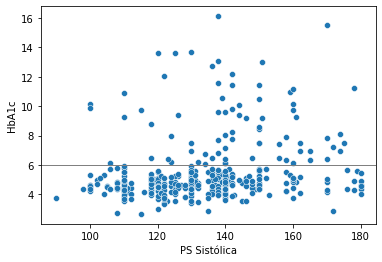

In [ ]:
sns.scatterplot(df_ajuste['PS Sistólica'], df_ajuste['HbA1c'])
plt.axhline(y=HbA1c_norm, color='gray', linewidth=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


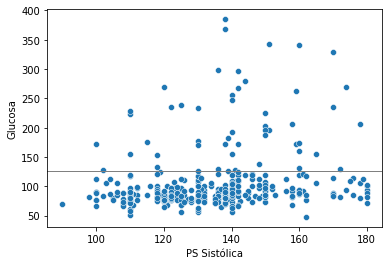

In [ ]:
sns.scatterplot(df_ajuste['PS Sistólica'], df_ajuste['Glucosa'])
plt.axhline(y=gluc_umbral, color='gray', linewidth=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


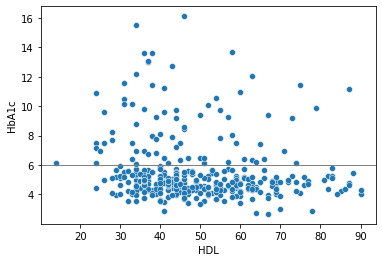

In [ ]:
sns.scatterplot(df_ajuste['HDL'], df_ajuste['HbA1c'])
plt.axhline(y=HbA1c_norm, color='gray', linewidth=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


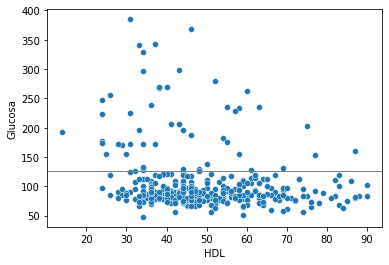

In [ ]:
sns.scatterplot(df_ajuste['HDL'], df_ajuste['Glucosa'])
plt.axhline(y=gluc_umbral, color='gray', linewidth=1)

## **Agrupación en clusters con el método de KMeans**

Como no se observaron diferencias con base en las variables categóricas Ubicación y Género, fueron excluídas del modelo.

In [ ]:
df_ajuste.drop(columns=['Ubicación', 'Género'], inplace=True)

In [ ]:
df_ajuste.columns

Index(['id', 'Colesterol', 'Glucosa', 'HDL', 'Colesterol/HDL', 'HbA1c', 'Edad',
       'Estatura (in)', 'Peso (lb)', 'PS Sistólica', 'PS Diastólica',
       'Cintura (in)', 'Cadera (in)'],
      dtype='object')

Se reestableció el índice después de la última transformación del conjunto de datos

In [ ]:
df_ajuste.reset_index(drop=True, inplace=True)

In [ ]:
df_ajuste.head(1)

,id,Colesterol,Glucosa,HDL,Colesterol/HDL,HbA1c,Edad,Estatura (in),Peso (lb),PS Sistólica,PS Diastólica,Cintura (in),Cadera (in)
0,1000,203.0,82,56.0,3.6,4.31,46,62.0,121.0,118.0,59.0,29.0,38.0


Las columnas utilizadas son todas las que quedan, con la excepción del id.

In [ ]:
cols = [col for col in df_ajuste.columns if col not in ['id']]
cols

['Colesterol',
 'Glucosa',
 'HDL',
 'Colesterol/HDL',
 'HbA1c',
 'Edad',
 'Estatura (in)',
 'Peso (lb)',
 'PS Sistólica',
 'PS Diastólica',
 'Cintura (in)',
 'Cadera (in)']

In [ ]:
X = df_ajuste[cols]
X.head(1)

,Colesterol,Glucosa,HDL,Colesterol/HDL,HbA1c,Edad,Estatura (in),Peso (lb),PS Sistólica,PS Diastólica,Cintura (in),Cadera (in)
0,203.0,82,56.0,3.6,4.31,46,62.0,121.0,118.0,59.0,29.0,38.0


### ***Implementación del modelo KMeans***

In [ ]:
from sklearn.cluster import KMeans

Como lo que interesa es predecir la diabetes, se instancia un modelo con dos clusters.

In [ ]:
model = KMeans(n_clusters=2)

In [ ]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
df_ajuste['Cluster'] = model.fit_predict(X)

In [ ]:
df_ajuste.head()

,id,Colesterol,Glucosa,HDL,Colesterol/HDL,HbA1c,Edad,Estatura (in),Peso (lb),PS Sistólica,PS Diastólica,Cintura (in),Cadera (in),Cluster
0,1000,203.0,82,56.0,3.6,4.31,46,62.0,121.0,118.0,59.0,29.0,38.0,0
1,1001,165.0,97,24.0,6.9,4.44,29,64.0,218.0,112.0,68.0,46.0,48.0,0
2,1005,249.0,90,28.0,8.9,7.72,64,68.0,183.0,138.0,80.0,44.0,41.0,0
3,1008,248.0,94,69.0,3.6,4.81,34,71.0,190.0,132.0,86.0,36.0,42.0,0
4,1011,195.0,92,41.0,4.8,4.84,30,69.0,191.0,161.0,112.0,46.0,49.0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


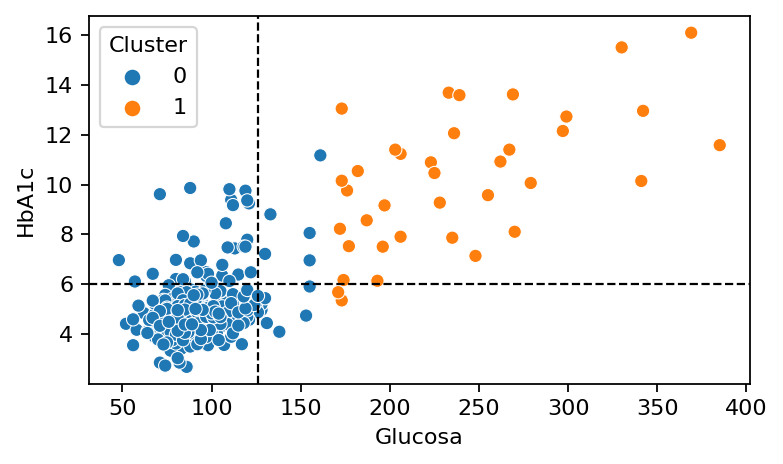

In [ ]:
f, axs = plt.subplots(1,1,figsize=(5,3), dpi=160)

sns.scatterplot(df_ajuste['Glucosa'], df_ajuste['HbA1c'], hue=df_ajuste['Cluster'])
plt.axhline(y=HbA1c_norm, color='k', linewidth=1, linestyle='--')
plt.axvline(x=gluc_umbral, color='k', linewidth=1, linestyle='--')

plt.tight_layout()
#download_fig('diab1_gluc_hba1c_kmeans_2c.png')

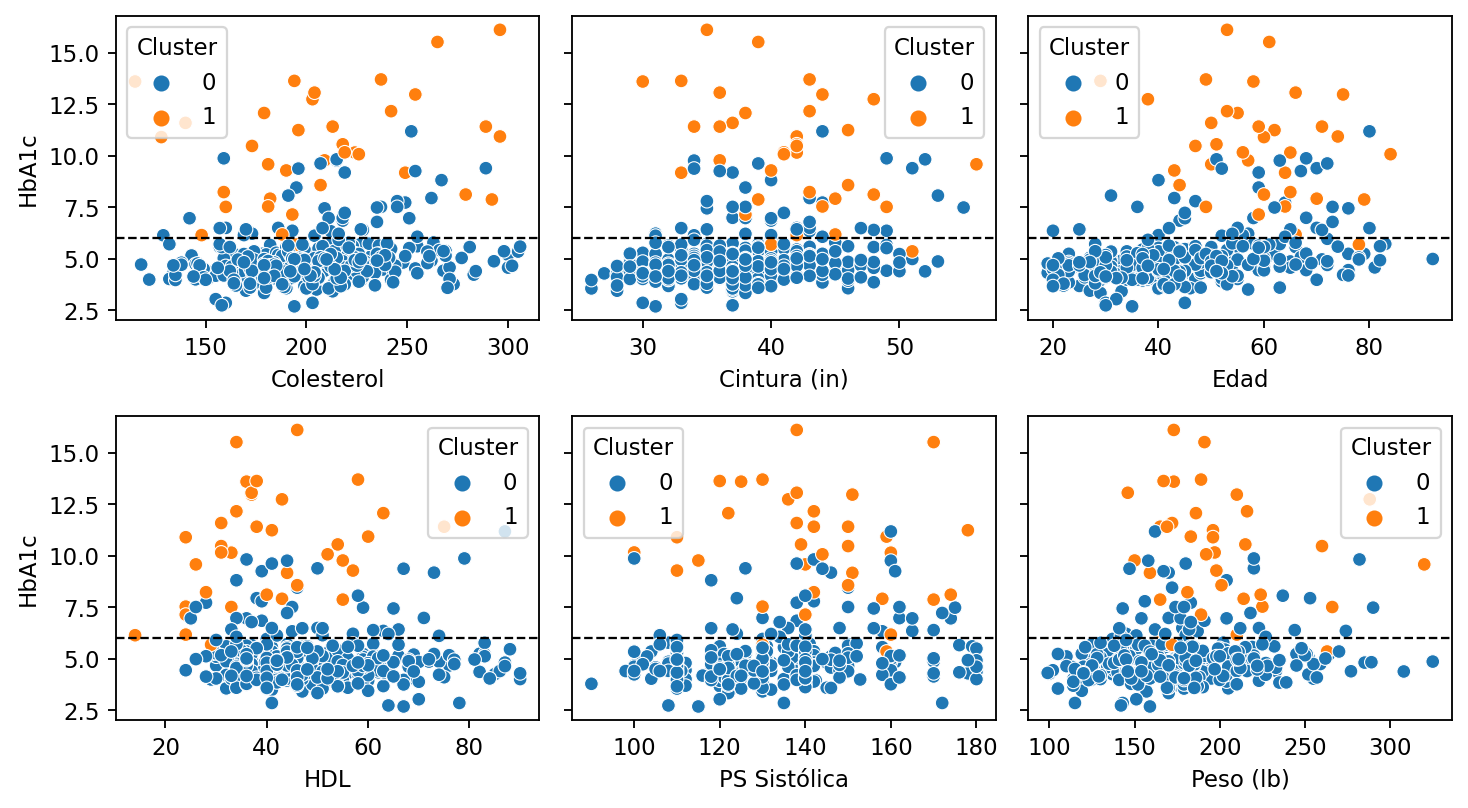

In [ ]:
i = 0
cols = ['Colesterol', 'Cintura (in)', 'Edad', 'HDL', 'PS Sistólica', 'Peso (lb)']
f, axs = plt.subplots(2,3,figsize=(9,5), dpi=165, sharey=True)
for r in range(2):
  for c in range(3):
    sns.scatterplot(ax=axs[r][c], x=df_ajuste[cols[i]], y=df_ajuste['HbA1c'], hue=df_ajuste['Cluster'])
    axs[r][c].axhline(y=HbA1c_norm, color='k', linewidth=1, linestyle='--')
    i+=1
plt.tight_layout()
#download_fig('diab1_scat_vars_hba1c_kmeans_2c.png')

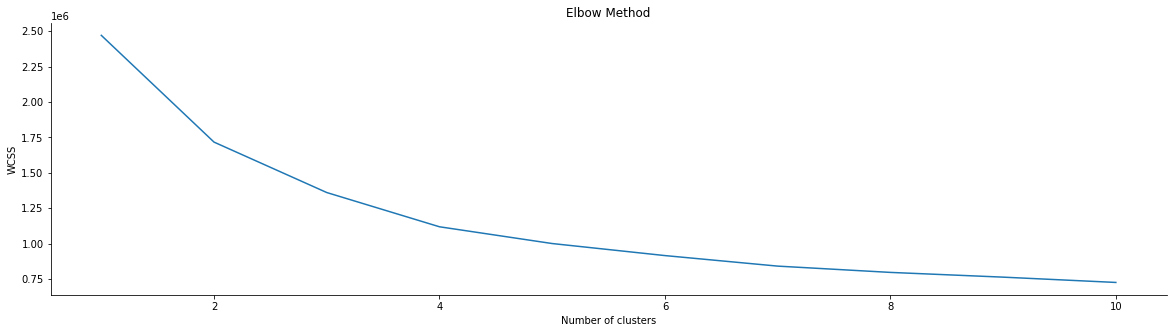

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.subplots(figsize=(20,5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
sns.despine()
plt.show()

In [ ]:
model = KMeans(n_clusters=3)

In [ ]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
df_ajuste['Cluster'] = model.fit_predict(X)

In [ ]:
df_ajuste.head()

,id,Colesterol,Glucosa,HDL,Colesterol/HDL,HbA1c,Edad,Estatura (in),Peso (lb),PS Sistólica,PS Diastólica,Cintura (in),Cadera (in),Cluster
0,1000,203.0,82,56.0,3.6,4.31,46,62.0,121.0,118.0,59.0,29.0,38.0,0
1,1001,165.0,97,24.0,6.9,4.44,29,64.0,218.0,112.0,68.0,46.0,48.0,2
2,1005,249.0,90,28.0,8.9,7.72,64,68.0,183.0,138.0,80.0,44.0,41.0,2
3,1008,248.0,94,69.0,3.6,4.81,34,71.0,190.0,132.0,86.0,36.0,42.0,2
4,1011,195.0,92,41.0,4.8,4.84,30,69.0,191.0,161.0,112.0,46.0,49.0,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


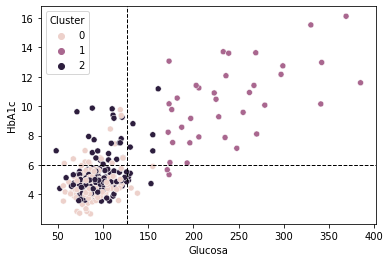

In [ ]:
sns.scatterplot(df_ajuste['Glucosa'], df_ajuste['HbA1c'], hue=df_ajuste['Cluster'])
plt.axhline(y=HbA1c_norm, color='k', linewidth=1, linestyle='--')
plt.axvline(x=gluc_umbral, color='k', linewidth=1, linestyle='--')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


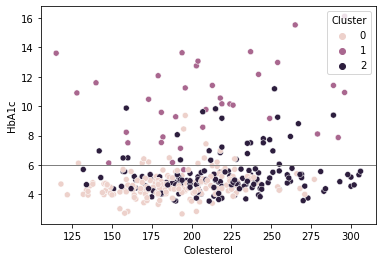

In [ ]:
sns.scatterplot(df_ajuste['Colesterol'], df_ajuste['HbA1c'], hue=df_ajuste['Cluster'])
plt.axhline(y=HbA1c_norm, color='gray', linewidth=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


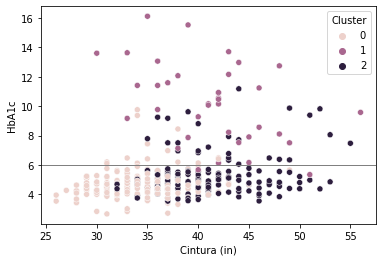

In [ ]:
sns.scatterplot(df_ajuste['Cintura (in)'], df_ajuste['HbA1c'], hue=df_ajuste['Cluster'])
plt.axhline(y=HbA1c_norm, color='gray', linewidth=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


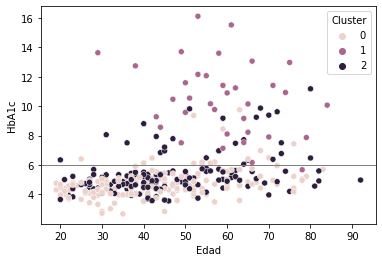

In [ ]:
sns.scatterplot(df_ajuste['Edad'], df_ajuste['HbA1c'], hue=df_ajuste['Cluster'])
plt.axhline(y=HbA1c_norm, color='gray', linewidth=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


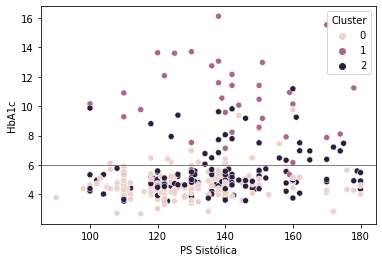

In [ ]:
sns.scatterplot(df_ajuste['PS Sistólica'], df_ajuste['HbA1c'], hue=df_ajuste['Cluster'])
plt.axhline(y=HbA1c_norm, color='gray', linewidth=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


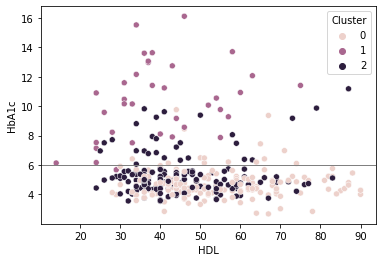

In [ ]:
sns.scatterplot(df_ajuste['HDL'], df_ajuste['HbA1c'], hue=df_ajuste['Cluster'])
plt.axhline(y=HbA1c_norm, color='gray', linewidth=1)

# **Diabetes en mujeres de ascendencia hindú**

[Descripción del conjunto de datos](https://www.kaggle.com/mathchi/diabetes-data-set)

### *Variables:*
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df2 = pd.read_csv('diabetes_mujeres.csv')

In [ ]:
df2.shape

(2000, 9)

In [ ]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
cols = ['Embarazos', 'Glucosa', 'PS Diastólica', 'Espesor Piel (mm)', 'Insulina', 'IMC', 'Linaje diabético', 'Edad', 'Diabetes']
df2.columns = cols
df2.head()

,Embarazos,Glucosa,PS Diastólica,Espesor Piel (mm),Insulina,IMC,Linaje diabético,Edad,Diabetes
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Embarazos          2000 non-null   int64  
 1   Glucosa            2000 non-null   int64  
 2   PS Diastólica      2000 non-null   int64  
 3   Espesor Piel (mm)  2000 non-null   int64  
 4   Insulina           2000 non-null   int64  
 5   IMC                2000 non-null   float64
 6   Linaje diabético   2000 non-null   float64
 7   Edad               2000 non-null   int64  
 8   Diabetes           2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [ ]:
df2.describe([i/100 for i in range(10, 100, 10)])

,Embarazos,Glucosa,PS Diastólica,Espesor Piel (mm),Insulina,IMC,Linaje diabético,Edad,Diabetes
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
10%,0.000000,85.000000,54.000000,0.000000,0.000000,23.700000,0.164000,22.000000,0.000000
20%,1.000000,95.000000,60.000000,0.000000,0.000000,26.000000,0.221800,23.000000,0.000000
30%,1.000000,102.000000,64.000000,11.000000,0.000000,28.300000,0.260000,25.000000,0.000000
40%,2.000000,109.000000,68.000000,18.000000,0.000000,30.100000,0.304000,26.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
60%,4.000000,125.000000,74.000000,28.000000,75.400000,33.800000,0.455000,33.000000,0.000000


El campo de **Insulina** no se utiliza para la realización del modelo predictivo, dado que se considera que normalmente un paciente comienza el tratamiento de insulina después del diagnóstico de diabletes.

In [ ]:
df2_ajuste = df2.copy()

In [ ]:
df2_ajuste.drop(columns=['Insulina'], inplace=True)

In [ ]:
df2_ajuste.head()

,Embarazos,Glucosa,PS Diastólica,Espesor Piel (mm),IMC,Linaje diabético,Edad,Diabetes
0,2,138,62,35,33.6,0.127,47,1
1,0,84,82,31,38.2,0.233,23,0
2,0,145,0,0,44.2,0.630,31,1
3,0,135,68,42,42.3,0.365,24,1
4,1,139,62,41,40.7,0.536,21,0


## ***Tratamiento de valores atípicos***

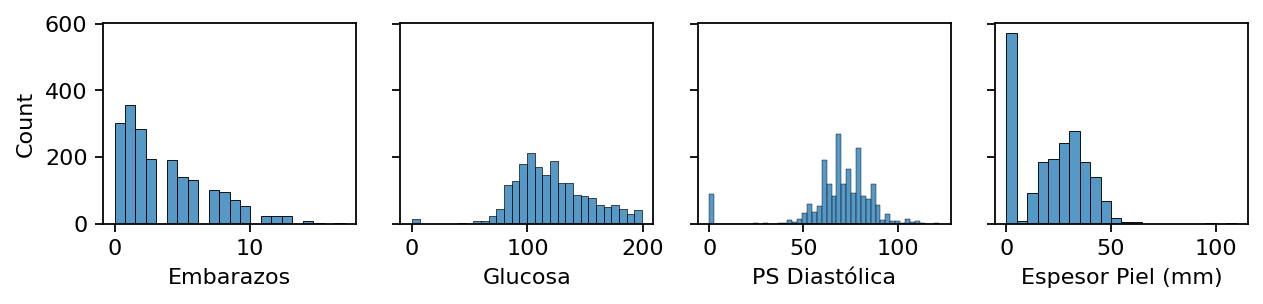

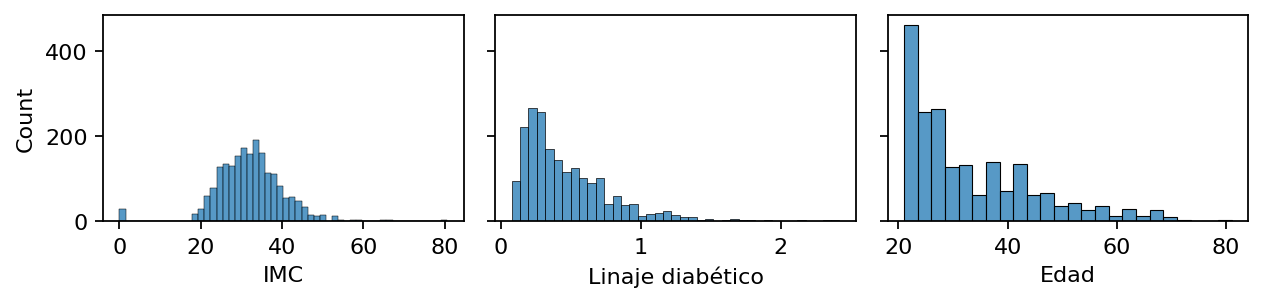

In [ ]:
hist_matrix(1, 4, df2_ajuste.columns[:5], df2_ajuste, w=8, h=2)
#download_fig('diab2_hist_matrix_with_outliers_1.png')
hist_matrix(1, 3, df2_ajuste.columns[4:-1], df2_ajuste, w=8, h=2)
#download_fig('diab2_hist_matrix_with_outliers_2.png')

Resulta imposible que algunas de las variables tengan valor de cero. Los registros que presentan dicha particularidad fueron eliminados. La variable **Espesor de la piel** fue la excepción a lo anterior, debido a que 537 de esos valores son 0 (casi el 30% del conjunto de datos). Por lo anterior,  se realizó una imputación de valores para la variable mencionada.

Además, se eliminaron los valores atípicos de las distintas variables con el criterio del **rango intercuartílico**.

### **Tratamiento para Glucosa, PS Diastólica e IMC**

#### ***Eliminación de registros con valor de cero***

In [ ]:
print('Conteo de registros con valor 0')
for var in ['Glucosa', 'PS Diastólica', 'Espesor Piel (mm)', 'IMC']:
  print('{}: {}'.format(var, df2_ajuste[df2_ajuste[var]==0][var].count()))

Conteo de registros con valor 0
Glucosa: 13
PS Diastólica: 90
Espesor Piel (mm): 573
IMC: 28


In [ ]:
# Eliminación de los registros con valor de 0:
for var in ['Glucosa', 'PS Diastólica', 'IMC']:
  df2_ajuste.drop(df2_ajuste[df2_ajuste[var]==0].index, inplace=True)

In [ ]:
print('Conteo de registros con valor 0')
for var in ['Glucosa', 'PS Diastólica', 'Espesor Piel (mm)', 'IMC']:
  print('{}: {}'.format(var, df2_ajuste[df2_ajuste[var]==0][var].count()))

Conteo de registros con valor 0
Glucosa: 0
PS Diastólica: 0
Espesor Piel (mm): 488
IMC: 0


In [ ]:
df2_ajuste.shape

(1888, 8)

#### ***Eliminación de valores atípicos (Criterio IQR)***

In [ ]:
for var in ['Glucosa', 'PS Diastólica', 'IMC']:
  print(f'{var}:')
  df2_ajuste = drop_outliers_iqr(df2_ajuste, var)

Glucosa:
Dimensiones del conjunto de datos: (1888, 8)

q1: 99.0
q3: 142.0
iqr: 43.0

Nuevas dimensiones del conjunto de datos: (1888, 8)

PS Diastólica:
Dimensiones del conjunto de datos: (1888, 8)

q1: 64.0
q3: 80.0
iqr: 16.0

Nuevas dimensiones del conjunto de datos: (1853, 8)

IMC:
Dimensiones del conjunto de datos: (1853, 8)

q1: 27.5
q3: 36.6
iqr: 9.100000000000001

Nuevas dimensiones del conjunto de datos: (1831, 8)



In [ ]:
#hist_matrix(1, 4, df2_ajuste.columns[:5], df2_ajuste, w=8, h=2)
#hist_matrix(1, 3, df2_ajuste.columns[4:-1], df2_ajuste, w=8, h=2)

### **Tratamiento para Espesor de la piel**

In [ ]:
df2_ajuste['Espesor Piel (mm)'].replace({0:np.nan}, inplace=True)

In [ ]:
df2_ajuste = drop_outliers_iqr(df2_ajuste, 'Espesor Piel (mm)')

Dimensiones del conjunto de datos: (1831, 8)

q1: 22.0
q3: 36.0
iqr: 14.0

Nuevas dimensiones del conjunto de datos: (1825, 8)



In [ ]:
#hist_matrix(2, 4, df2_ajuste.columns[:-1], df2_ajuste)

#### ***Imputación de valores para Espesor de la piel***

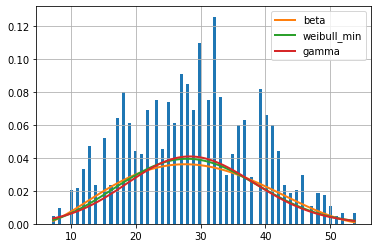

In [ ]:
# weibull_min no parece adecuada y mueve mucho el gráfico
#f1 = Fitter(df_ajuste['HbA1c'].dropna(), distributions=['gamma', 'beta', 'weibull_min', 'weibull_max'])
f = Fitter(df2_ajuste['Espesor Piel (mm)'].dropna(), distributions=['gamma', 'beta', 'weibull_min'])
f.fit()
summary_ngtb = f.summary()

In [ ]:
best_params=f.get_best()
best_params

{'beta': (2.6250972421530907,
  3.1412720261529428,
  5.500036566549073,
  51.21128679653372)}

In [ ]:
from scipy.stats import beta
dist  = beta(*best_params['beta'])

In [ ]:
nulos = df2_ajuste['Espesor Piel (mm)'].isnull().sum()
nulos

470

In [ ]:
# Imputación de valores utilizando la distribución beta
df2_ajuste.loc[df2_ajuste['Espesor Piel (mm)'].isnull(),'Espesor Piel (mm)']=dist.rvs(size=nulos)

In [ ]:
# Corroboración de imputación
df2_ajuste['Espesor Piel (mm)'].isnull().sum()

0

In [ ]:
#hist_matrix(1, 4, df2_ajuste.columns[:5], df2_ajuste, w=8, h=2)
#hist_matrix(1, 3, df2_ajuste.columns[4:-1], df2_ajuste, w=8, h=2)

### **Tratamiento para las variables restantes**

#### ***Eliminación de valores atípicos (Criterio IQR)***

In [ ]:
for var in ['Embarazos', 'Linaje diabético', 'Edad']:
  print(f'{var}:')
  df2_ajuste = drop_outliers_iqr(df2_ajuste, var)

Embarazos:
Dimensiones del conjunto de datos: (1825, 8)

q1: 1.0
q3: 6.0
iqr: 5.0

Nuevas dimensiones del conjunto de datos: (1813, 8)

Linaje diabético:
Dimensiones del conjunto de datos: (1813, 8)

q1: 0.24600000000000002
q3: 0.624
iqr: 0.378

Nuevas dimensiones del conjunto de datos: (1751, 8)

Edad:
Dimensiones del conjunto de datos: (1751, 8)

q1: 24.0
q3: 40.0
iqr: 16.0

Nuevas dimensiones del conjunto de datos: (1712, 8)



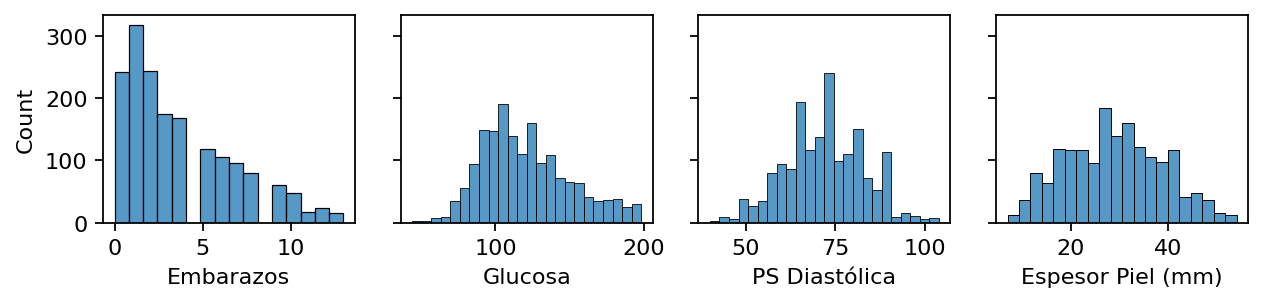

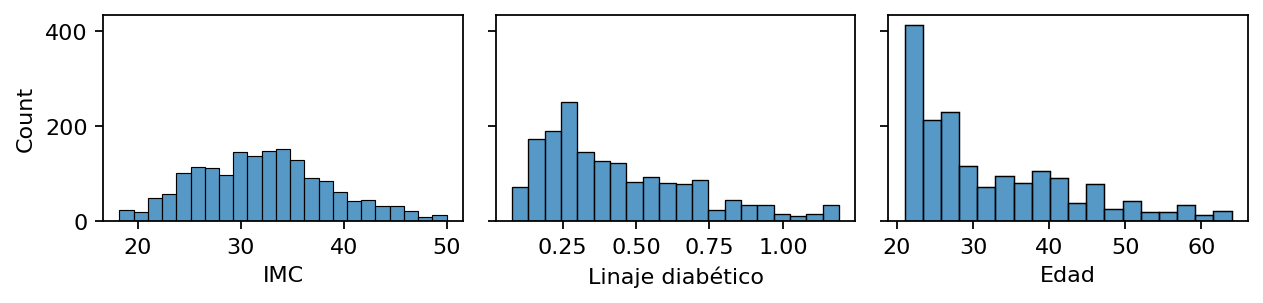

In [ ]:
hist_matrix(1, 4, df2_ajuste.columns[:5], df2_ajuste, w=8, h=2)
#download_fig('diab2_hist_matrix_without_outliers_1.png')
hist_matrix(1, 3, df2_ajuste.columns[4:-1], df2_ajuste, w=8, h=2)
#download_fig('diab2_hist_matrix_without_outliers_2.png')

## **Análisis exploratorio de datos (EDA)**

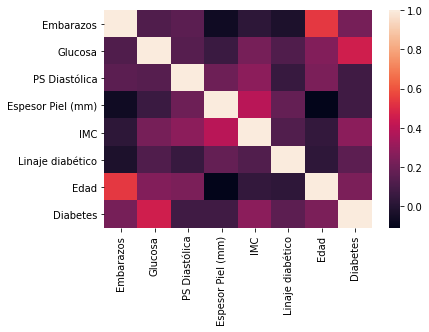

In [ ]:
sns.heatmap(df2[[c for c in df2.columns if c not in ['Insulina']]].corr())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

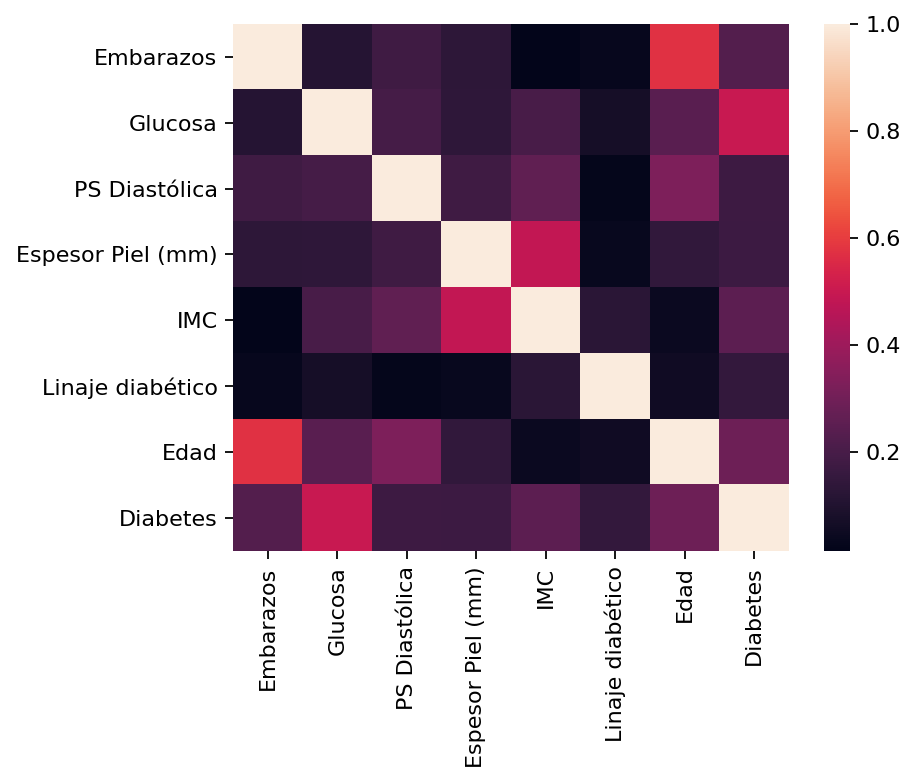

In [ ]:
f, axs = plt.subplots(1,1,figsize=(6,5), dpi=160)

sns.heatmap(df2_ajuste.corr())

plt.tight_layout()
#download_fig('diab2_heat_map.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


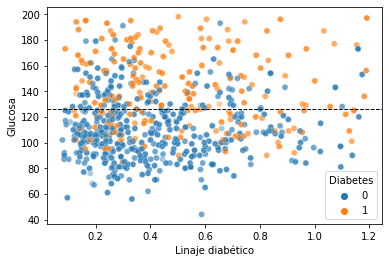

In [ ]:
sns.scatterplot(df2_ajuste['Linaje diabético'], df2_ajuste['Glucosa'], hue=df2_ajuste['Diabetes'], alpha=0.4)
plt.axhline(y=gluc_umbral, color='k', linewidth=1, linestyle='--')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


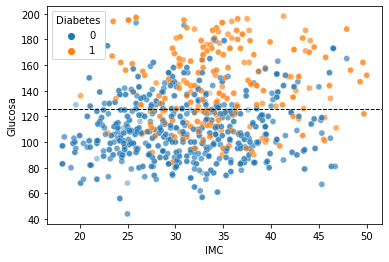

In [ ]:
sns.scatterplot(df2_ajuste['IMC'], df2_ajuste['Glucosa'], hue=df2_ajuste['Diabetes'], alpha=0.4)
plt.axhline(y=gluc_umbral, color='k', linewidth=1, linestyle='--')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


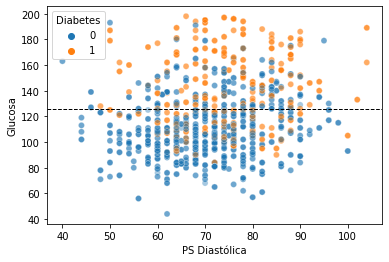

In [ ]:
sns.scatterplot(df2_ajuste['PS Diastólica'], df2_ajuste['Glucosa'], hue=df2_ajuste['Diabetes'], alpha=0.4)
plt.axhline(y=gluc_umbral, color='k', linewidth=1, linestyle='--')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


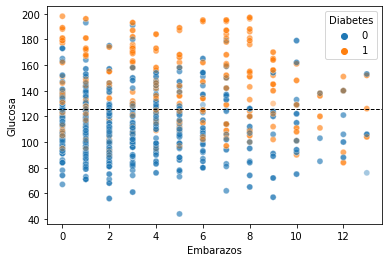

In [ ]:
sns.scatterplot(df2_ajuste['Embarazos'], df2_ajuste['Glucosa'], hue=df2_ajuste['Diabetes'], alpha=0.4)
plt.axhline(y=gluc_umbral, color='k', linewidth=1, linestyle='--')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


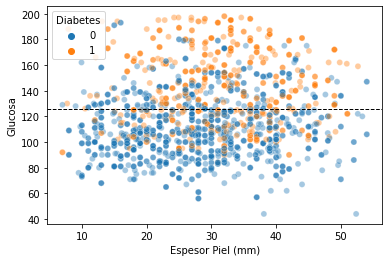

In [ ]:
sns.scatterplot(df2_ajuste['Espesor Piel (mm)'], df2_ajuste['Glucosa'], hue=df2_ajuste['Diabetes'], alpha=0.4)
plt.axhline(y=gluc_umbral, color='k', linewidth=1, linestyle='--')

## **Modelo predictivo**

In [ ]:
df2_ajuste.reset_index(drop=True, inplace=True)

In [ ]:
X = df2_ajuste[[col for col in df2_ajuste.columns if col not in ['Diabetes']]].copy()

In [ ]:
X.head()

,Embarazos,Glucosa,PS Diastólica,Espesor Piel (mm),IMC,Linaje diabético,Edad
0,2,138,62,35.0,33.6,0.127,47
1,0,84,82,31.0,38.2,0.233,23
2,0,135,68,42.0,42.3,0.365,24
3,1,139,62,41.0,40.7,0.536,21
4,0,173,78,32.0,46.5,1.159,58


In [ ]:
y = df2_ajuste[['Diabetes']]

In [ ]:
y.head()

,Diabetes
0,1
1,0
2,1
3,0
4,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 100)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### **Árbol de decisión clasificador**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix

In [ ]:
def metricas(model,Xv,yv): #Mide efectividad de un Modelo Predictivo
    print( ' ROC: %.3f' %roc_auc_score(y_score=model.predict_proba(Xv)[:,1],y_true=yv))
    print( ' Accuracy: %.3f' %accuracy_score(y_pred=model.predict(Xv),y_true=yv))
    print( ' Matriz de confusión: ', "\n",confusion_matrix(y_pred=model.predict(Xv),y_true=yv))

In [ ]:
metricas(classifier,X_test, y_test)

 ROC: 0.930
 Accuracy: 0.943
 Matriz de confusión:  
 [[355   8]
 [ 24 178]]


In [ ]:
metricas(classifier,X, y)

 ROC: 0.500
 Accuracy: 0.680
 Matriz de confusión:  
 [[1164    0]
 [ 548    0]]


In [ ]:
classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

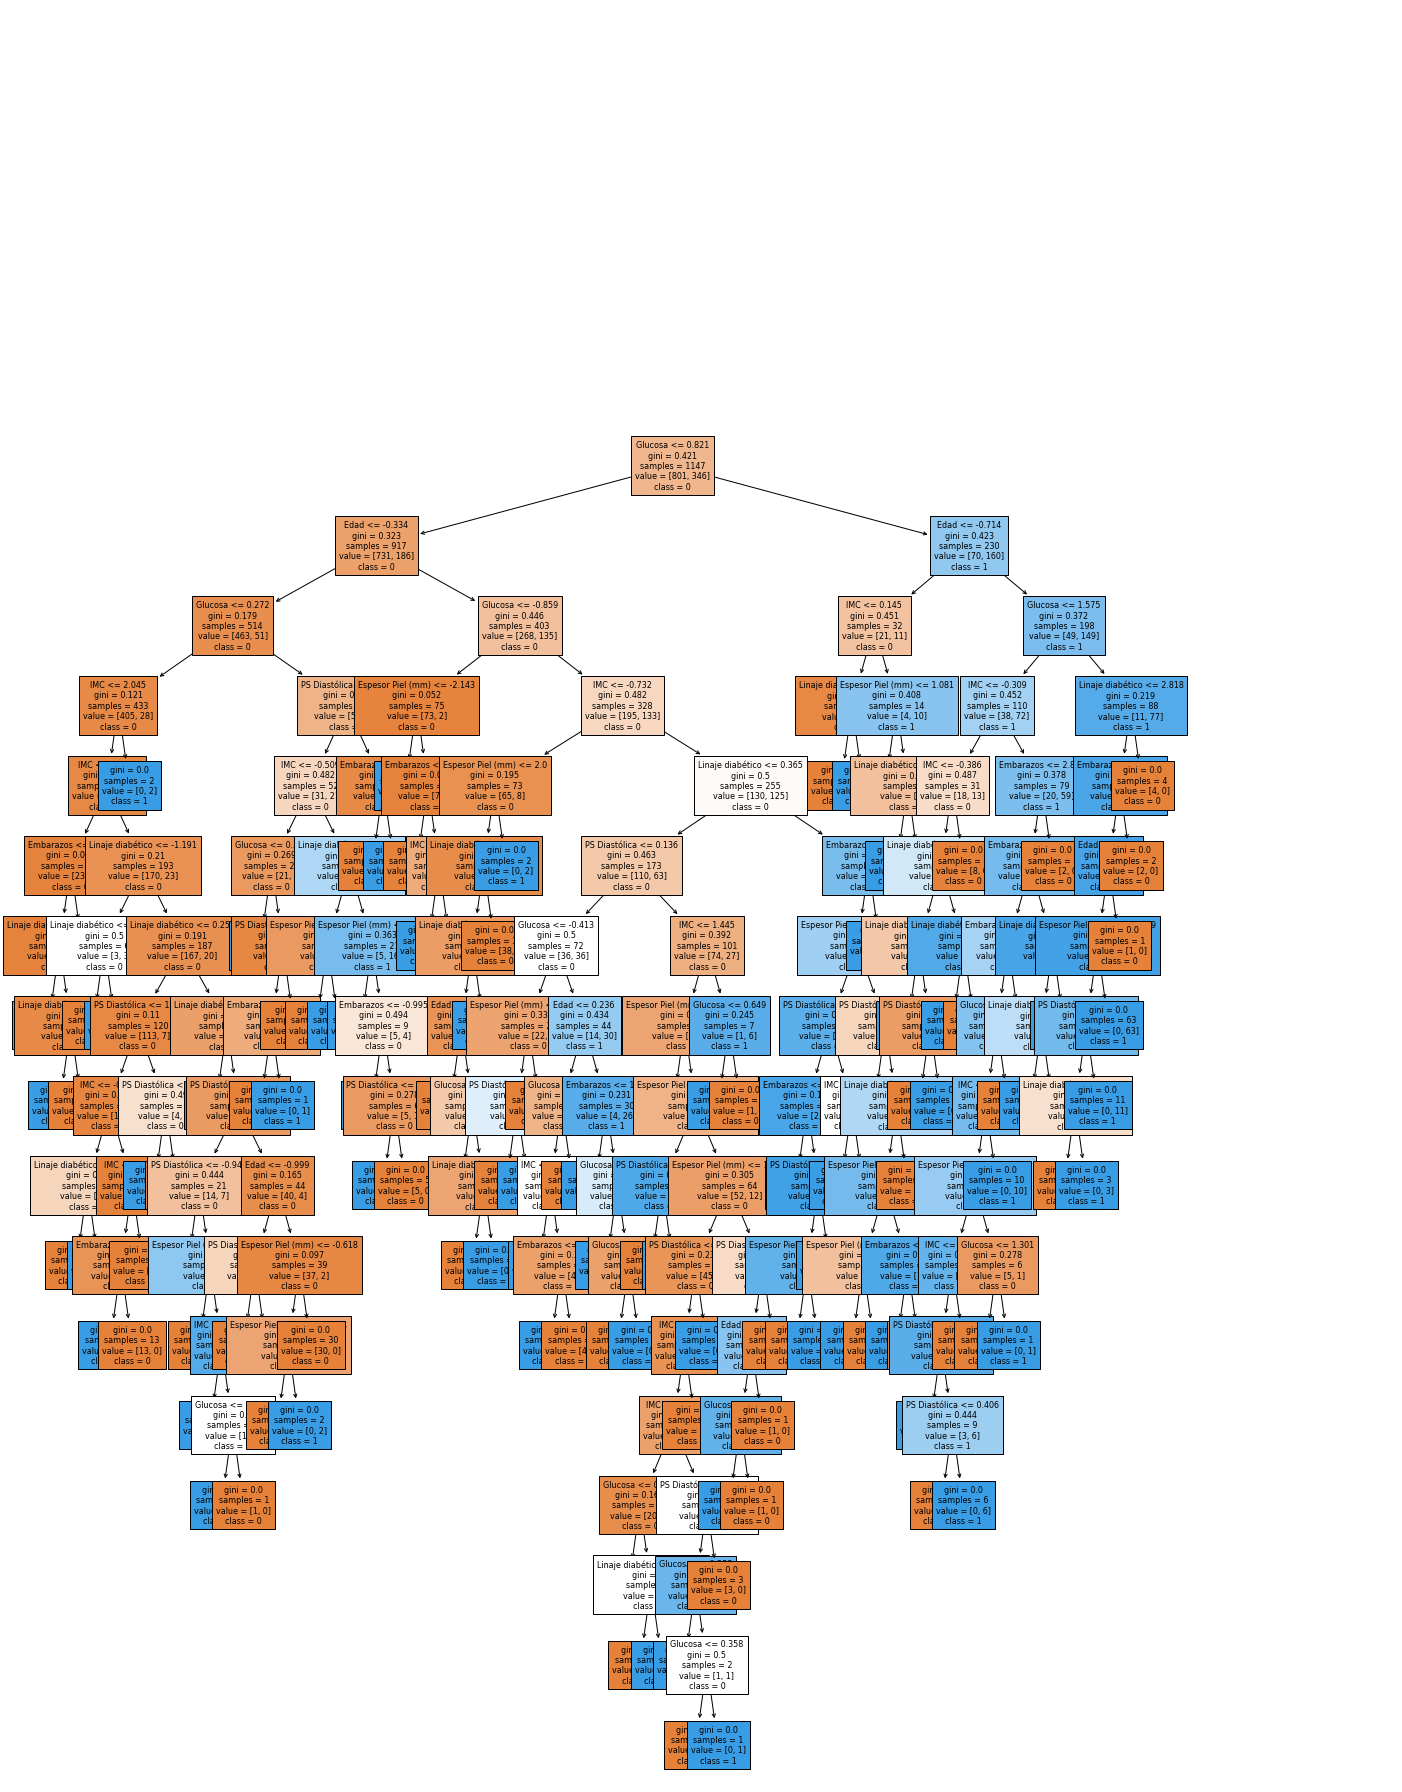

In [ ]:
from sklearn.tree import plot_tree, export_graphviz
fig = plt.figure(figsize=(20,25))
_ = plot_tree(classifier, 
                   feature_names=X.columns,  
                   class_names=['0','1'],
                   filled=True,fontsize=8)
plt.tight_layout()
download_fig('diab2_decision_tree.png')

### **Perceptrón multicapa**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(max_iter=100)

In [ ]:
mlp.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
metricas(mlp,X_test,y_test)

 ROC: 0.865
 Accuracy: 0.786
 Matriz de confusión:  
 [[320  43]
 [ 78 124]]


In [ ]:
metricas(mlp, X, y)

 ROC: 0.502
 Accuracy: 0.320
 Matriz de confusión:  
 [[   0 1164]
 [   0  548]]


In [ ]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 100,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

El árbol de decisión mostró un mejor desempeño que el perceptrón multicapa. Se llevó a cabo el proceso de hiperparametrización para encontrar algún conjunto de parámetros que mejoren el desempeño del perceptrón.

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
search = RandomizedSearchCV(param_distributions=param_grid, cv=2, n_jobs=-1, scoring="accuracy", estimator=mlp, n_iter=10, verbose=5)

In [ ]:
search.fit(X=X_train, y=y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    8.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_fun=15000, max_iter=100,
                                           momentum=0.9, n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           random...
                                           verbose=False, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'ac

In [ ]:
model_best=search.best_estimator_

In [ ]:
search.score(X_test, y_test)

0.8778761061946903

In [ ]:
metricas(model_best,X_test,y_test)

 ROC: 0.946
 Accuracy: 0.878
 Matriz de confusión:  
 [[324  39]
 [ 30 172]]


In [ ]:
metricas(model_best,X,y)

 ROC: 0.500
 Accuracy: 0.321
 Matriz de confusión:  
 [[   1 1163]
 [   0  548]]


In [ ]:
model_best.get_params()

{'activation': 'relu',
 'alpha': 0.05,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (50, 50, 50),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 100,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

Al final de cuentas, ambos modelos mostraron un desempeño similar.